In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_palette('pastel')

# The project follows CRISP-DM framework:

### Business Understanding:
A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out:
- The reason of customer attrition.
- Leverage the insights gained to predict customers who are likely to drop off.

So what can we do with this: 
- 
### Data understanding: (Data meaning, Data source)
#### EDA Framework: 
- What sort of hypotheses have you formed about the data?
- Which attributes seem promising for further analysis?
- Have your explorations revealed new characteristics about the data?
- How have these explorations changed your initial hypothesis?
- Can you identify particular subsets of data for later use?
- Take another look at your data mining goals. Has this exploration altered the goals?

#### EDA Process:
1. Get the data.
2. Check for NaN, check for duplicates, check for data types
3. Location, dispersion each variables.
4. Correlation analysis
5. Outliers detecting.
6. Checking the data hypothesis.
        
### Data meaning: 
   - Credit limits: The maximum amount of money a lender will allow a consumer to spend using a credit card.
   - Months on book: Period of relationship with bank.
   - Total_Relationship_Count: Total no. of products held by the customer.
   - Months_Inactive: No. of months inactive in the last 12 months.
   - Contacts_Count_12_mon: No. of Contacts in the last 12 months.
   - Total_Revolving_Bal:  Total revolving balance is the sum of portions of credit card spending that goes unpaid at the end of a billing cycle.
   - Avg_Open_To_Buy: The amount of credit available at a averaged in a year on a credit card holder's account.
   - Total_Amt_Chng_Q4_Q1: Change in Transaction Amount from Q4-Q1.
   - Total_Trans_Amt: Total Transaction Amount. (Last 12 months)    
   - Total_Trans_Ct: Total Transaction Count. (Last 12 months)
   - Total_Ct_Chng_Q4_Q1: Change in Transaction Count. (Q4 over Q1)
   - Avg_Utilization_Ratio: Credit card debt/ Credit card limits.
### Data hypothesis: 
- There shouldn't be any duplicated CLIENTNUM.
- People who seems inactive is likely to churn.
- Some demographic informations is more likely to churn. (How well do people manage their account?)
- Churning might be because of lack of debt managing ability from the customer (Avg_Utilization_Ratio).
- The higher the attachment with the credit card issuer, the less likely the customer will churn.
- (Transaction amount changed in a year span) /  might be the indicator of attrition. 
- People with higher card category usualy has higher total transaction amount.
- High number of dependent makes people use their credit card more(more transaction/ more amount spent on transactions.)
- Total revolving balance helps to predict whether customer will attrite or not. 

### EDA Questions: 
- What is the main influence that lead to customers attrition? 


##### 1. Get the data

In [2]:
data = pd.read_csv(r'C:\Projects\Credit_Card_Project\BankChurnersdata.csv', encoding='utf8', header='infer')
data = data.drop(labels=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### 2. Check for NaN, check for duplicates, check for data types.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [5]:
cat_features = ['Attrition_Flag', 'Gender', 'Income_Category','Card_Category']
for i in cat_features:
    print(data[i].value_counts())

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


#### There are categorical features that should be process for further analysis, such as: 
- Attrition_Flag
- Gender
- Income_Category
- Card_Category (but for the sake of convenience in the EDA process, these features will be kept as it is.)

There is no duplicated values in the dataset. There is also no same clientnum in the dataset.

#### 3. Distributions of the data.

In [6]:
def plot_dist_features (feature_name):
    fig = plt.figure(figsize=(12,7))
    ax = fig.add_axes()
    sns.histplot(data[feature_name], ax=ax, bins=20)
    plt.xlabel(feature_name)
    plt.title('Distribution of {feature_name}'.format(feature_name=feature_name))
    plt.show()

def plot_box_plot(feature_name,x):
    fig = plt.figure(figsize=(12,7))
    ax = fig.add_axes()
    sns.boxplot(y= data[feature_name],x=x, ax=ax)
    plt.title('Boxplot of {feature_name}'.format(feature_name=feature_name))
    plt.show()


### Attrition_Flag Distribution

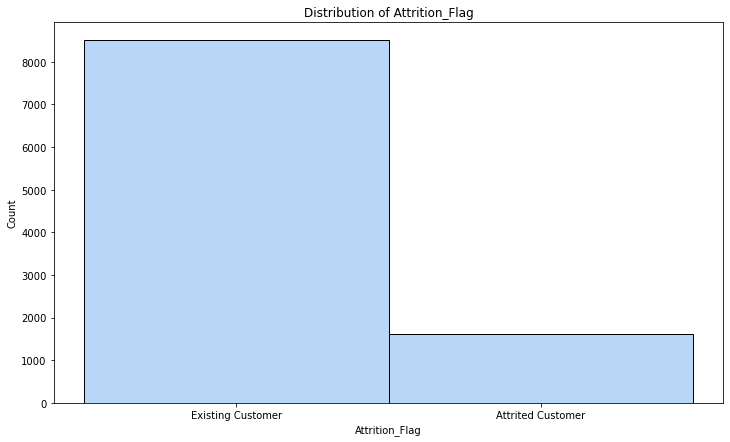

In [7]:
plot_dist_features('Attrition_Flag')

- Clearly the amount of Existing customers far surpassed the Attrited Customers.
- This would make the Machine Learning predictions for attrited customers hard since the dataset is skewed. (Considerations for trying to balance the dataset)
- Check the correlation of this feature and Gender.

### Distribution of Customer age.

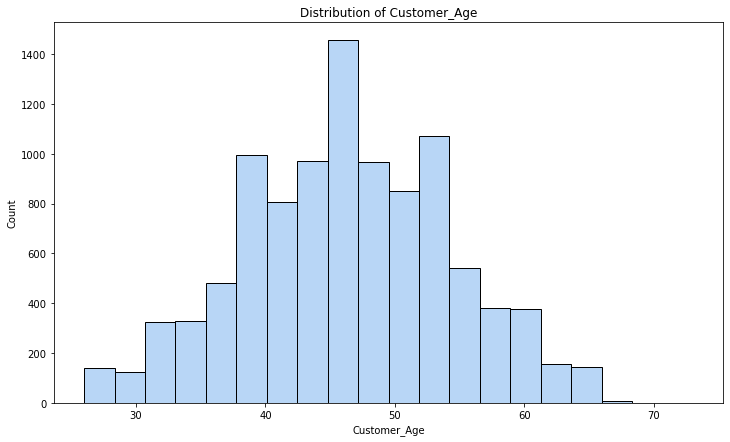

In [8]:
plot_dist_features('Customer_Age')

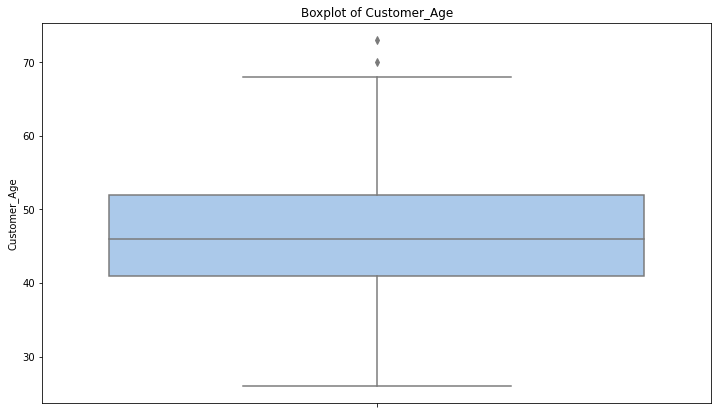

In [9]:
plot_box_plot('Customer_Age',None)

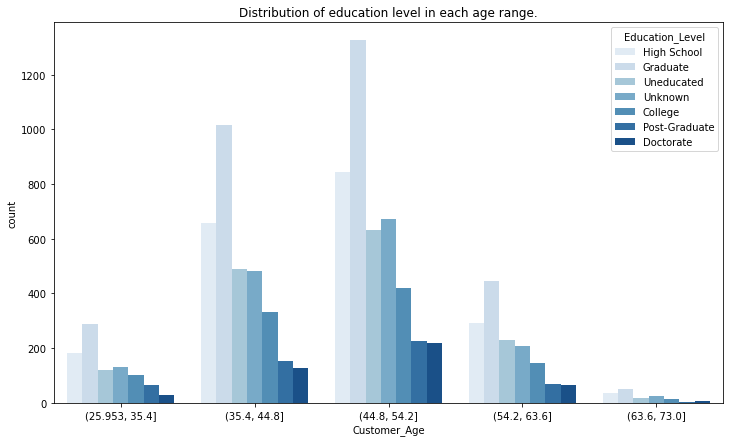

In [10]:
plt.figure(figsize=(12,7))
sns.countplot(x=pd.cut(data['Customer_Age'],bins=5), hue=data['Education_Level'],palette='Blues')

plt.title('Distribution of education level in each age range.')
plt.show()


- Mainly people in their 40-50s
- There are surprisingly little people below 30 years old. 
- Most people are graduates. Second-most are people with highschool degrees. 

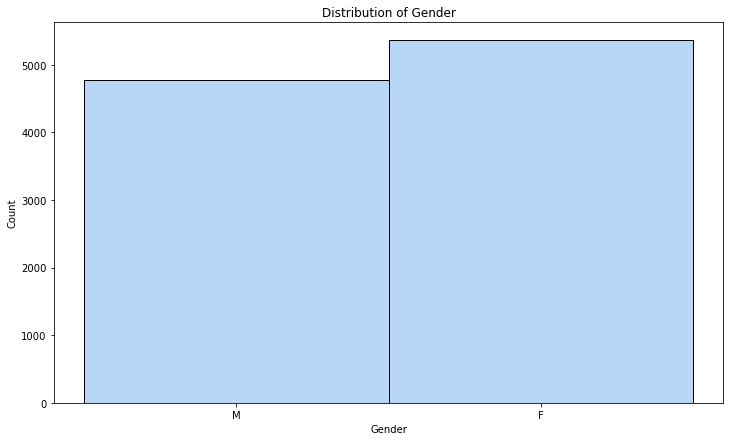

In [11]:
plot_dist_features('Gender')

- Approximately equal size of Male and Female in the dataset. (With the slight edge to Female)
- Question Raised: Is there more female using credit card than male? (Has to perform hypothesis testing.)
- Question Raised: Does gender affect attrition rate?

<Figure size 864x504 with 0 Axes>

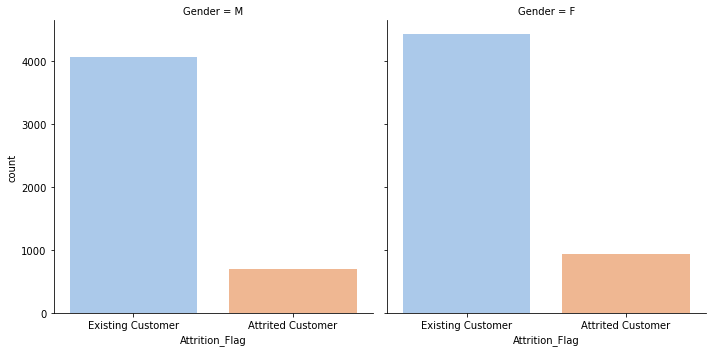

In [12]:
plt.figure(figsize=(12,7))
sns.catplot(x="Attrition_Flag", col='Gender', kind='count', data=data)
plt.show()

- Between male and female, there isn't much of a difference of attrition rate. Seems like gender doesn't affect attrition rate.

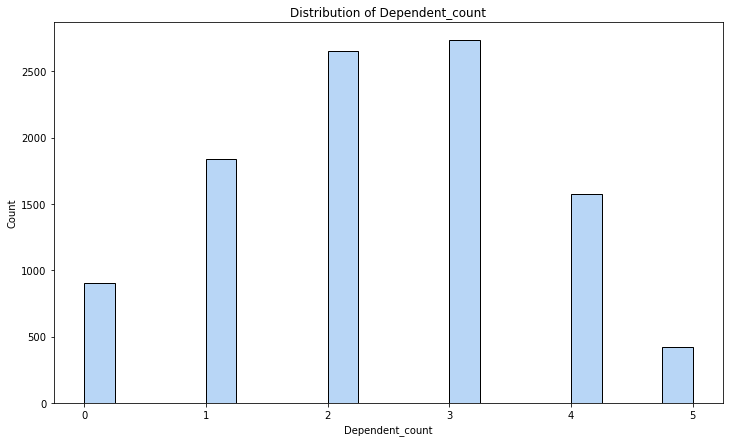

In [13]:
plot_dist_features('Dependent_count')

- Mostly from 2-3 dependent count
- Question Raised: Is there a difference between people in younger age versus people in older age in dependent count?
- Question Raised: Is there a correlation between the total amount spent in credit card and dependent count?

<AxesSubplot:xlabel='Customer_Age', ylabel='count'>

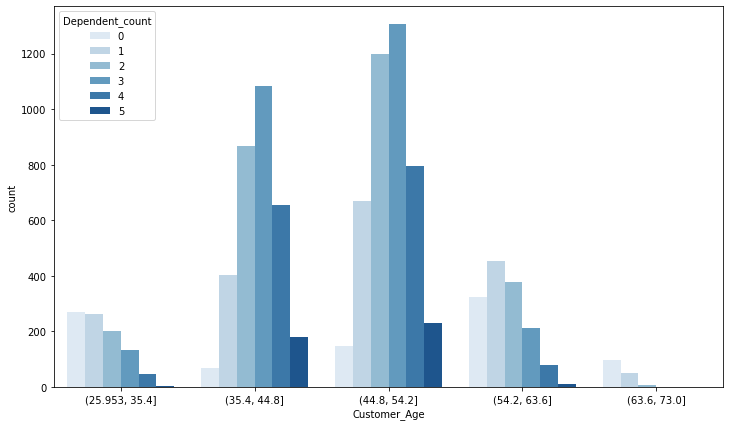

In [14]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x=pd.cut(data['Customer_Age'],bins=5),hue='Dependent_count',palette="Blues")

- Old and young people have less dependents (Old is above 63, young is under 35)
- People who do not belong to the 2 groups usually have 1-4 dependents.

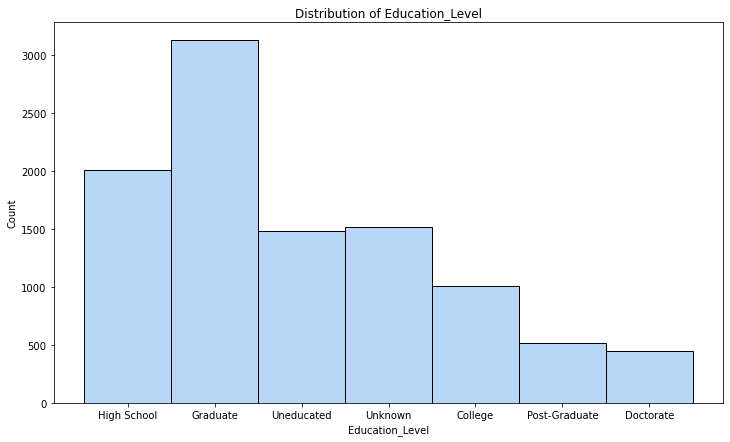

In [15]:
plot_dist_features('Education_Level')

- There are suprisingly alot of people who are only completed highschool.
- Is this distribution level of education affects the amount spent with credit card


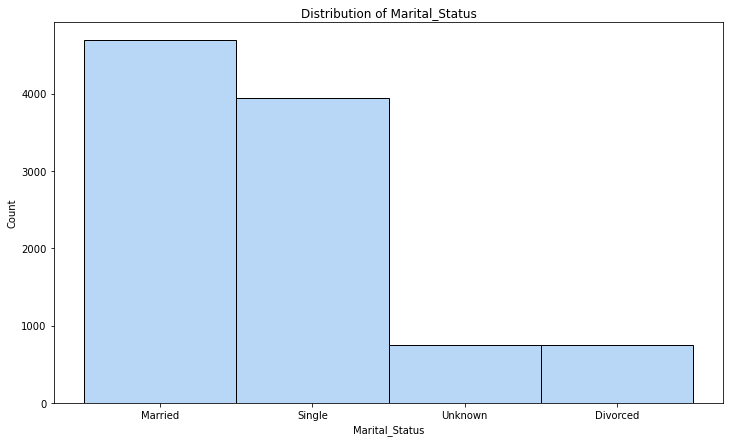

In [16]:
plot_dist_features('Marital_Status')

- Most people are married or single.
- Not many said their Marital status is unknown or divorced
- Is there a difference between attrited customers and normal customers in this? 

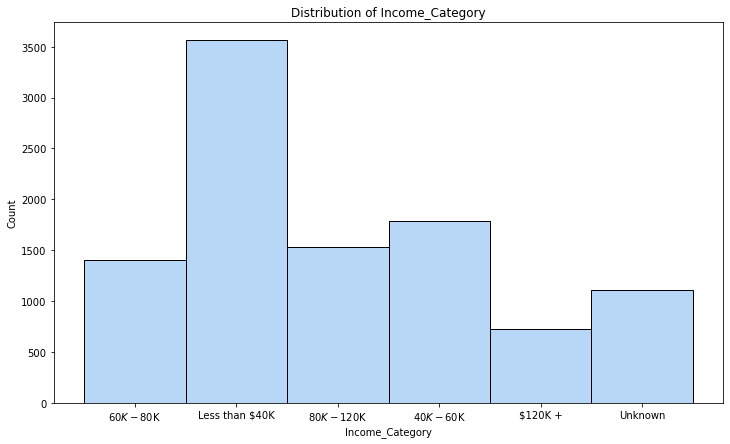

In [17]:
plot_dist_features('Income_Category')

- The distribution is heavily right-skewed, as it assumed to be.

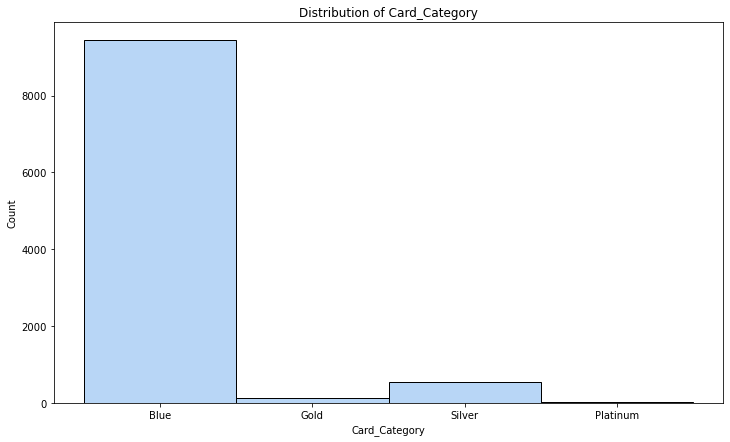

In [18]:
plot_dist_features('Card_Category')

- The higher the level of card category, the lower amount of users that use them. 

In [19]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

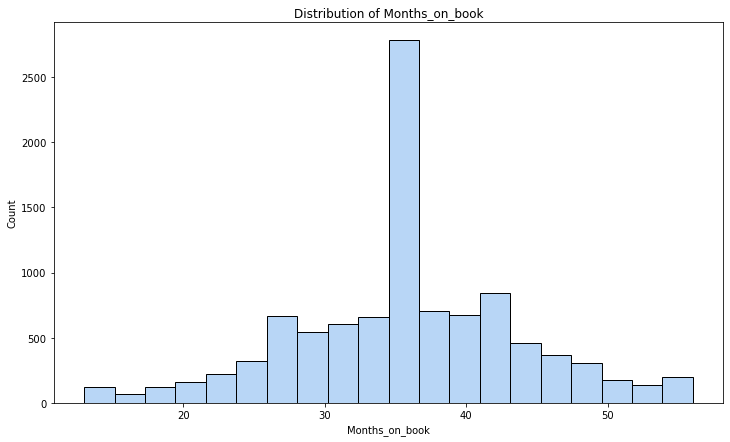

In [20]:
plot_dist_features('Months_on_book')

- Surprising amount of people that started using the credit card at the same time and still remain active.

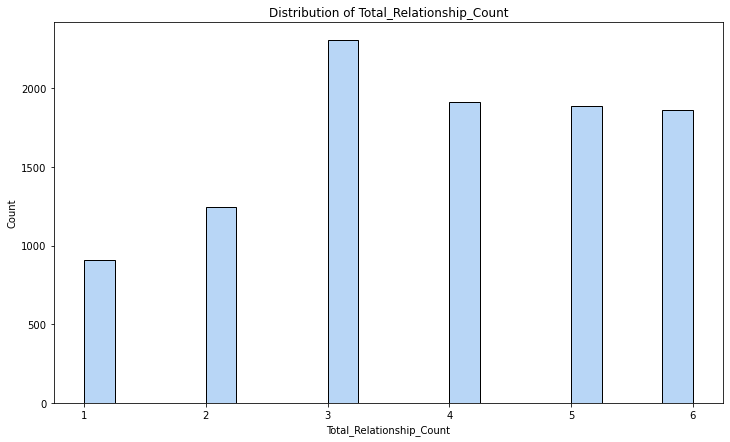

In [21]:
plot_dist_features('Total_Relationship_Count')

- Not really following a particular trend/distribution. 
- 4,5,6 seems to have the same amount, maybe there are a group of this specific group of customers that have this relationship count. (maybe there is not sufficient data to clarify this)

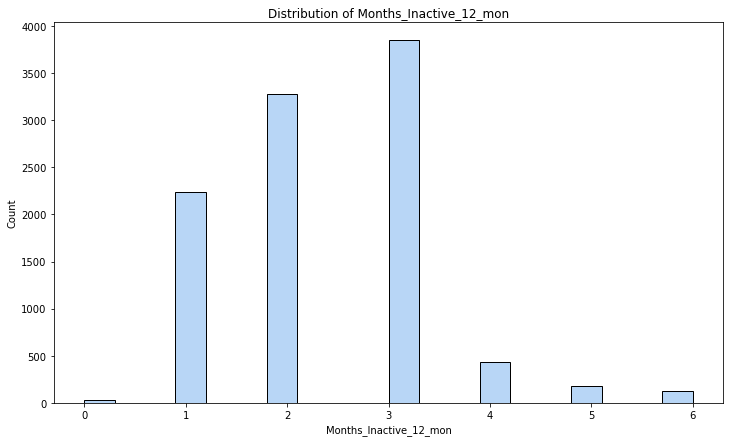

In [22]:
plot_dist_features('Months_Inactive_12_mon')

- Majority has 1,2,3 months of inactivity. 
- Maybe people with 4 months or more of inactivity would quit already.

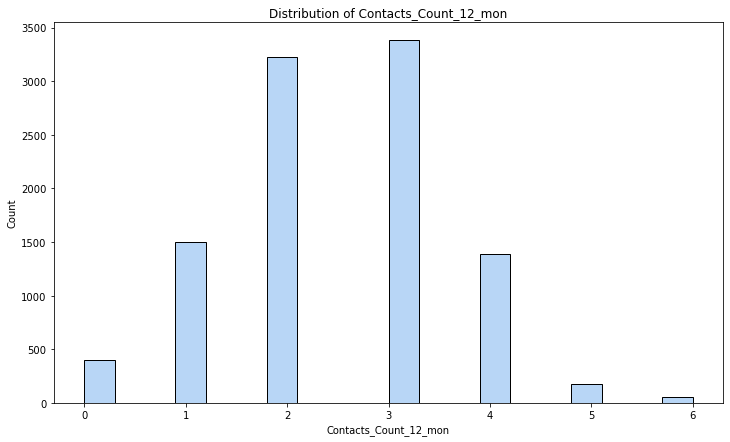

In [23]:
plot_dist_features('Contacts_Count_12_mon')

- Similar to normal distribution. 

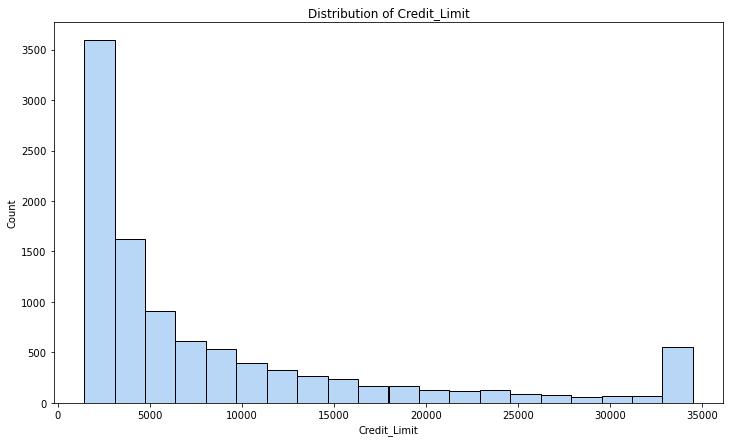

In [24]:
plot_dist_features('Credit_Limit')

- Right-skewed, which is correct to assumption.
- Abnormal value at 35000. 

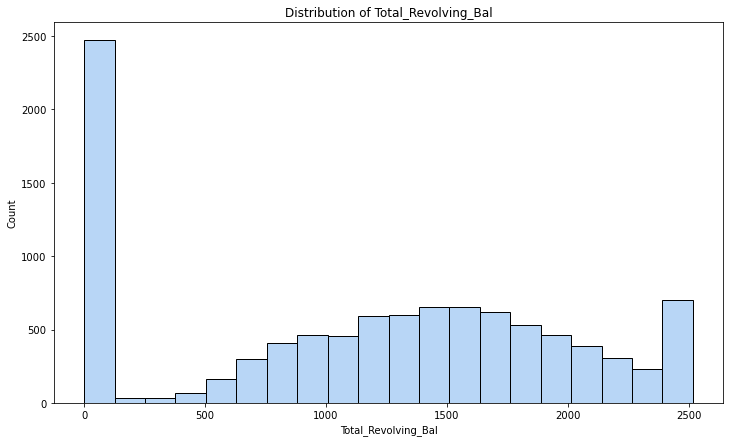

In [25]:
plot_dist_features('Total_Revolving_Bal')

- Most people pay their bills on time.
- For people who don't pay their bills on time, the distribution follows a normal distribution.
- How people with different dependants and credit card types pay their bills? 
- There are a lot of revolving balance at 25000, which means there are a lot of people who have the same credit card level that tends to not pay when they are 2500 in debt? 

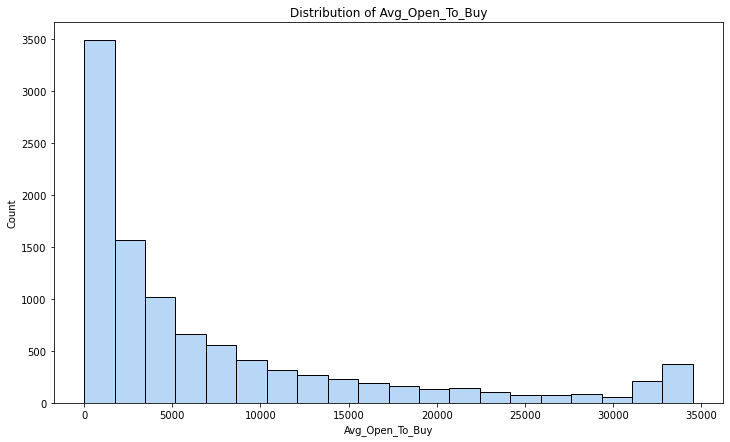

In [26]:
plot_dist_features('Avg_Open_To_Buy')

- This is heavily right-skewed.
- Same pattern with Credit card limit and total revolving balance, the end of the spectrum have a tendency to increase in count.
- Most people used up their credit card and pay for it on time. 


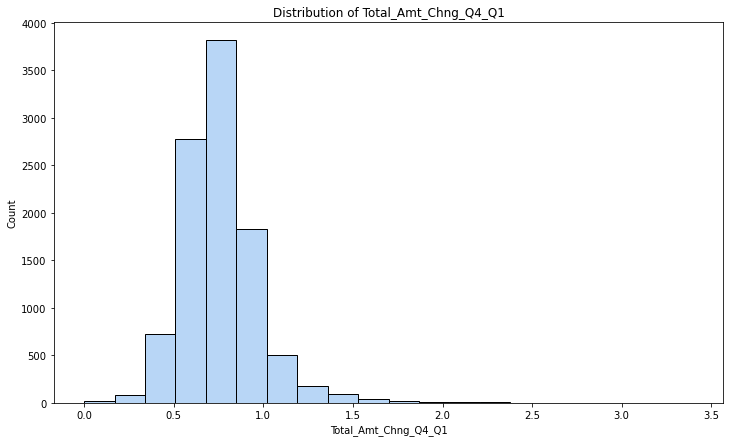

In [27]:
plot_dist_features('Total_Amt_Chng_Q4_Q1')

- Follows a normal distribution. 
- Has a right tail. 
- Not much change with this the total amount of transactions. Which means people usually used up their credit card, and majority of them have the same credit card level.

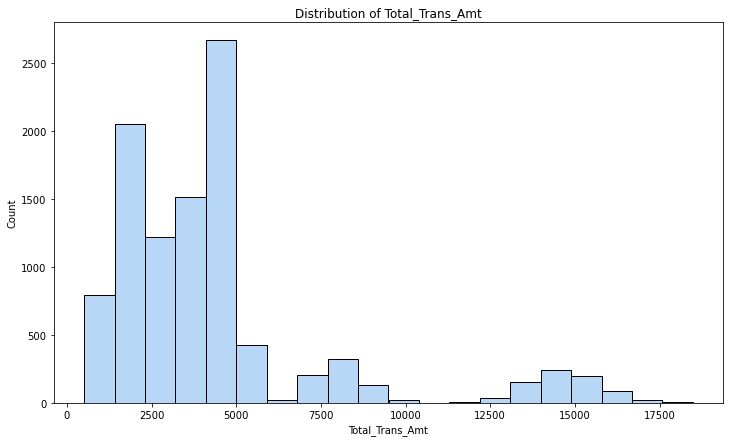

In [28]:
plot_dist_features('Total_Trans_Amt')

- Trimodel distribution
- This might have a high correlation with credit card type.

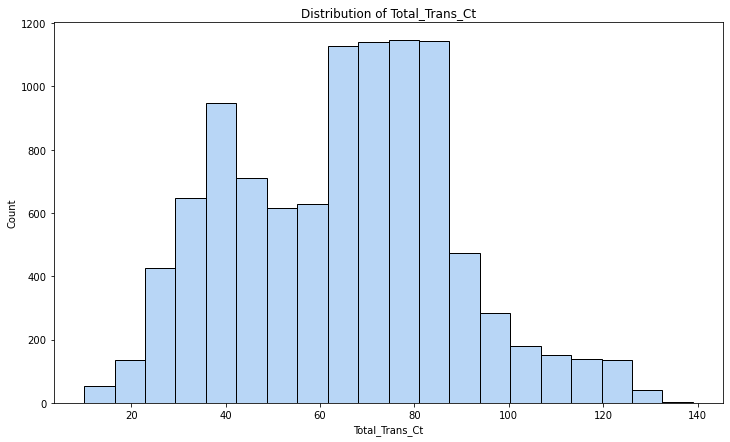

In [29]:
plot_dist_features('Total_Trans_Ct')

- Not a clear distribution that it follows.

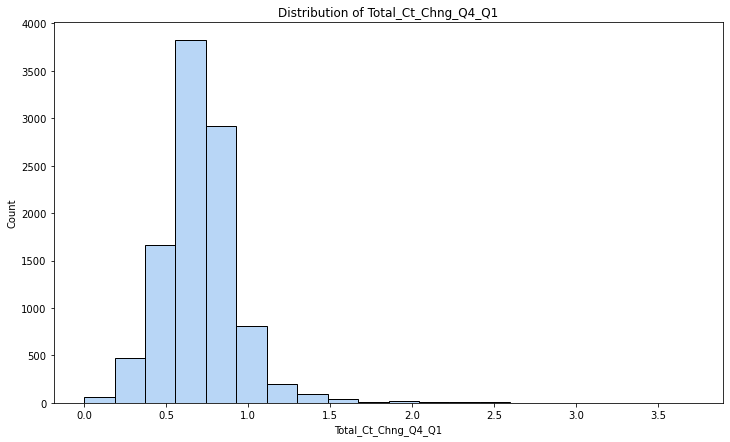

In [30]:
plot_dist_features('Total_Ct_Chng_Q4_Q1')

- Has a right tail.
- Number of total transactions made each month seems consistent, maybe they only use their credit card as a habit, paying for specific places, for specific things each month, but this has to be stuff that are essential, has to be purchased each month. (?)

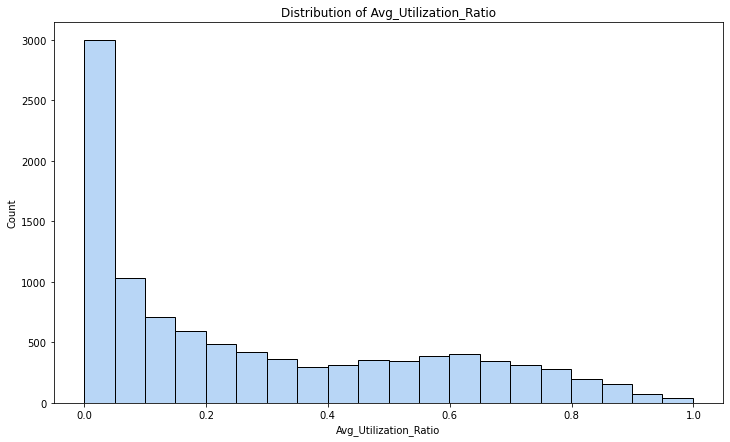

In [31]:
plot_dist_features('Avg_Utilization_Ratio')

- This show how well people managing their account.
- Most people do not owe money. (Same POV as stated above)

5. Correlation Analysis

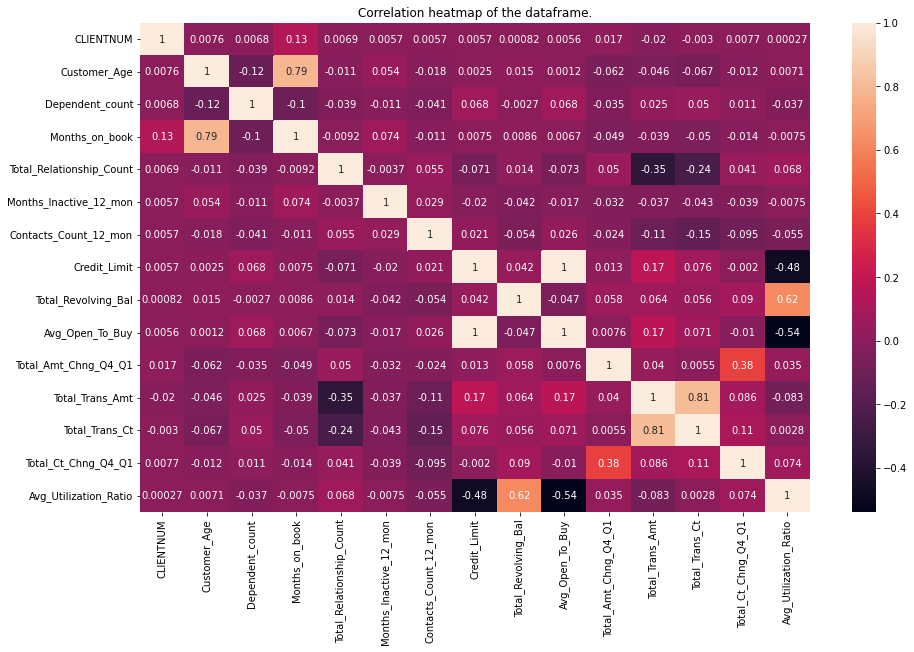

In [32]:
def plot_correlation_heatmap(data):
    fig = plt.figure(figsize=(15,9))
    ax = fig.add_axes()
    sns.heatmap(data.corr(),ax = ax, annot=True)
    plt.title('Correlation heatmap of the dataframe.')
    # plt.savefig(r'F:\corr.png', transparent = True)

plot_correlation_heatmap(data=data)


##### Correlation analysis: 
- Avg_Open_To_Buy and Credit_Limit is 1, seems logical since the more credit card limit people have, the more is available at the end of the month. But people usually used up the credit card limit => people with higher credit card limit won't use up their credit card and only people with lower level card use up theirs. 
- The older the customer, the more likely that they will stay long term with a service (?). Or maybe they just lived for a longer time. 
- Credit Limit and Total Revolving Balance have high correlation with Avg_Utilization_Ratio because it is involved in the formula of calculating Avg_Utilization_Ratio.

### Checking Hypothesis

1) People seems inactive is likely to churn:
We should use features like 'Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1':

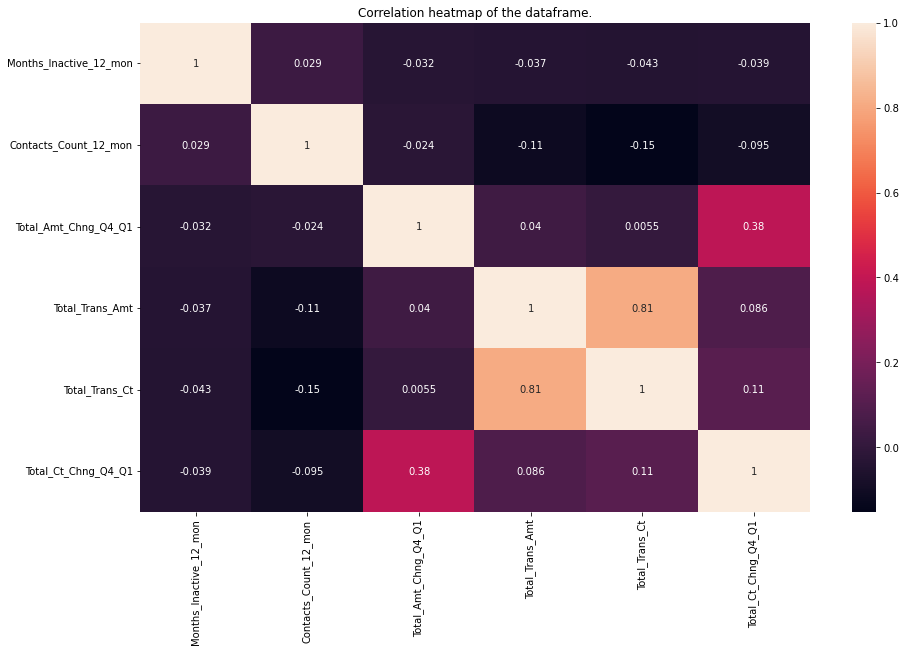

In [33]:
plot_correlation_heatmap(data[['Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']])

- Number of contacts made doesn't ensure customers' activeness.

- These 2 features have almost the same distribution.

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='count'>

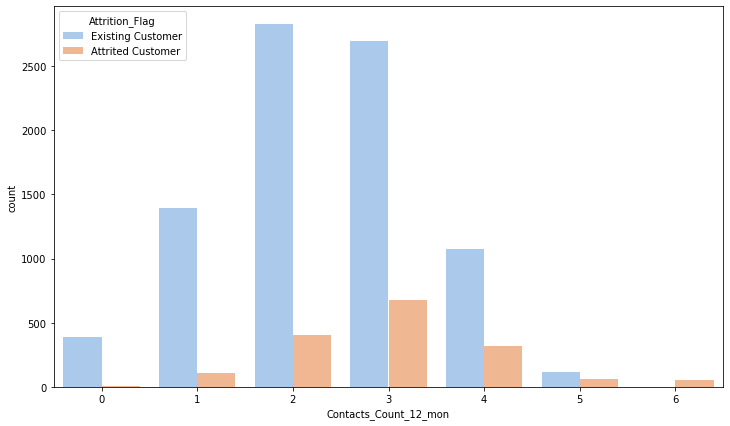

In [34]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='Contacts_Count_12_mon',hue='Attrition_Flag')

Why do people with 6 contacts(most contacts in the dataset) only attrited? This only account for 0.5% so it might not be that important.
- Maybe the more they use it the more the get frustrated with it. 
- The rest follows the distribution of the feature, this suggest that this feature does not have a clear impact on the output variable.

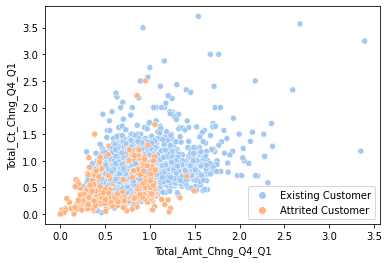

In [35]:
sns.scatterplot(x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1',data=data,hue='Attrition_Flag')
plt.legend(loc='best')

There seems to be a connection. Existing customers usually have high total transaction count change and high transaction amount change. This means that they only use their credit card on certain occasions, not on a recurring basis. Reasons:
- They only use it on certain occasions.
- They dont use it often, so they automatically are good at managing their debt, which makes them less dependent of credit cards => use it more effectively. 

### Feature Importance from Tree Model.

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [39]:
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [40]:
data_prep = data.copy()
data_prep.drop(['CLIENTNUM'], axis=1, inplace=True)
data_prep['Attrition_Flag'] = data_prep['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1 })
data_prep['Gender'] = data_prep['Gender'].map({'F':0,'M':1 }) 
data_prep['Education_Level'] = pd.get_dummies(data_prep['Education_Level'],dummy_na=True)
data_prep['Marital_Status'] = pd.get_dummies(data_prep['Marital_Status'],dummy_na=True)
data_prep['Card_Category'] = data_prep['Card_Category'].map({'Blue':1,'Silver':2,'Gold':3,'Platinum':4})
data_prep['Income_Category'] = data_prep['Income_Category'].map({'Less than $40K':0 ,'$40K - $60K':1, '$80K - $120K':2,'$60K - $80K':3,'$120K +':4, 'Unknown':-1})

y_train = data_prep["Attrition_Flag"]
X_train = data_prep.drop(['Attrition_Flag'],axis=1)

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train,y_train)
forest.feature_importances_

array([0.03406262, 0.00898388, 0.01305474, 0.00263283, 0.0021364 ,
       0.01115771, 0.00325615, 0.02420038, 0.06853918, 0.02492404,
       0.02869817, 0.03340672, 0.11094727, 0.03177135, 0.06328849,
       0.20295802, 0.16787425, 0.10425922, 0.06384859])

In [41]:
feature_importance = pd.DataFrame({'Name':X_train.columns, 'Value':forest.feature_importances_})
feature_importance.sort_values('Value',ascending=False)

,Name,Value
15,Total_Trans_Amt,0.202958
16,Total_Trans_Ct,0.167874
12,Total_Revolving_Bal,0.110947
17,Total_Ct_Chng_Q4_Q1,0.104259
8,Total_Relationship_Count,0.068539
18,Avg_Utilization_Ratio,0.063849
14,Total_Amt_Chng_Q4_Q1,0.063288
0,Customer_Age,0.034063
11,Credit_Limit,0.033407
13,Avg_Open_To_Buy,0.031771


Feature importance based on impurity from a random forest classifier model suggests the above results:
- Total transactions amount will identify the customers will attrite or not. 
- Total revolving balance also shows that people are likely to have debt or not. 
- Marital status does not affect attrition rate.
- Income category also does not affect this element.
#### We still do not know how these features affect the output variable.

<AxesSubplot:ylabel='Avg_Utilization_Ratio'>

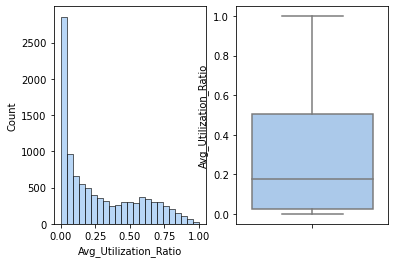

In [42]:
figure, axes = plt.subplots(1,2)
sns.histplot(data['Avg_Utilization_Ratio'],ax=axes[0])
sns.boxplot(y = data['Avg_Utilization_Ratio'],ax=axes[1])

Most people have utilization rate from 0.5 or below. There is a rate of 0.9999, which is insanely high

In [43]:
data.loc[data['Avg_Utilization_Ratio'] == data['Avg_Utilization_Ratio'].max()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4443,709444983,Attrited Customer,38,F,3,Uneducated,Single,$40K - $60K,Blue,30,...,2,3,2435.0,2432,3.0,0.12,1460,32,0.103,0.999


How does education level affects utilization ratio, total revolving balance?

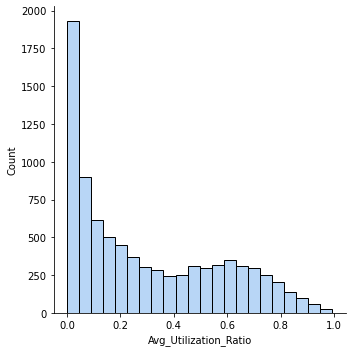

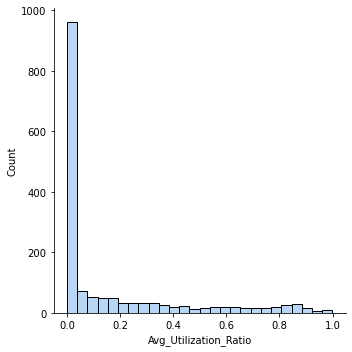

In [44]:
# sns.distplot(x='Avg_Utilization_Ratio',data = data[data['Attrition_Flag'] == 0])
sns.displot(data[data['Attrition_Flag']=='Existing Customer']['Avg_Utilization_Ratio'])
sns.displot(data[data['Attrition_Flag']=='Attrited Customer']['Avg_Utilization_Ratio'])

# figure, ax = plt.subplots(2,1)
# figure.set_size_inches((12,7))
plt.show()

Not a specific trend with this. Seems like Avg_Utilization_Ratio does not have much of an impact (?)

<Figure size 1080x720 with 0 Axes>

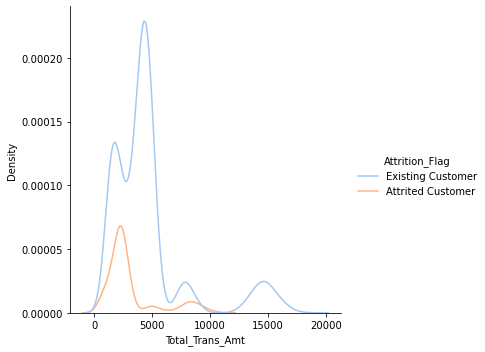

In [45]:
plt.figure(figsize=(15,10))
sns.displot(x='Total_Trans_Amt', hue='Attrition_Flag',data=data,kind='kde')
plt.show()

In [46]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

How does education level affects utilization ratio, total revolving balance

### Outlier Detection: 
-